In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO
import math
%matplotlib inline

In [2]:
characters = "abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789/\|!@#$%^&*()_+=-{}[]~`"

In [3]:
def gen_seq(array, length, string=""):
    if len(string) == length:
        array.append(string)
    else:
        for char in characters:
            gen_seq(array, length, string+char)

In [4]:
arr = []
gen_seq(arr,3)
print(len(arr))
arr.sort()

614125


In [5]:
def funct(x):
    return x.startswith("g") or x.startswith("&")

In [6]:
def find_inflection(f, arr):
    result = map(f, arr)
    mod_ln = len(arr)/20
    points = []
    for i, item in enumerate(result):
        if i == 0:
            past = item
        if item != past:
            points.append(i-1)
            points.append(i)
            points.append(i+1)
            past = item
#         if i % mod_ln == 0:
#             points.append(i)
    return points

inflect = find_inflection(funct, arr)
print(len(inflect))

12


In [7]:
outp = []
inp = []
for index in inflect:
    inp.append(arr[index])
    if funct(arr[index]):
        outp.append(1)
    else:
        outp.append(0)

In [8]:
df = pd.DataFrame({ 'input' : pd.Series(inp),
                    'output' : pd.Series(outp)
                  })

In [9]:
sns.set(style="whitegrid", color_codes=True)

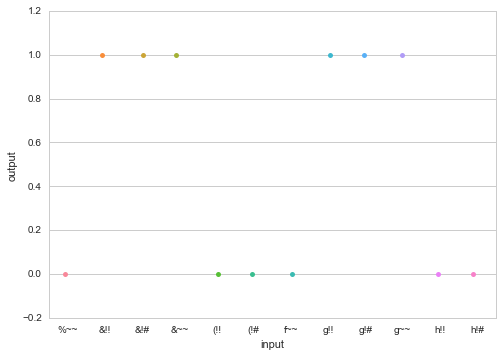

In [10]:
sns.stripplot(x="input", y="output", data=df, jitter=True)

In [11]:
out = []
inpt = []

for i in range(-50, 50, 5):
    inpt.append(i)
    out.append((math.pow(i, 3))/3)

def graph_two(x, y):
    df = pd.DataFrame({ 'input' : pd.Series(x),
                    'output' : pd.Series(y)
                  })
    sns.set(style="whitegrid", color_codes=True)
    sns.stripplot(x="input", y="output", data=df, jitter=True)

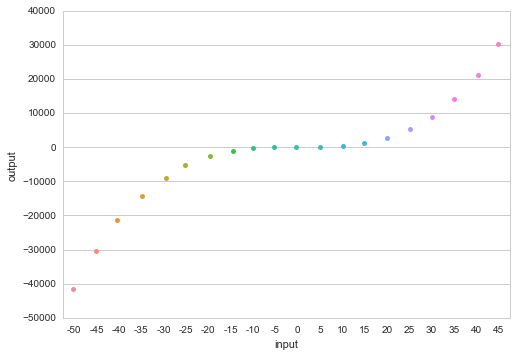

In [12]:
graph_two(inpt, out)

In [13]:
def complex_function(s):
    if s[0:2] == s[2:4]: 
        return 0
    elif s[0:2] < s[2:4]:
        return 1
    elif s[0:2] >= s[2:4]:
        return -1

In [14]:
arr = []
gen_seq(arr,4)
print(len(arr))
arr.sort()

52200625


In [15]:
inflect = find_inflection(complex_function, arr)

In [16]:
inflect = inflect[0:65015]
print(inflect[-1])

52200624


In [17]:
outp = []
inp = []
for index in inflect:
    inp.append(arr[index])
    outp.append(complex_function(arr[index]))

In [18]:
df = pd.DataFrame({ 'input' : pd.Series(inp),
                    'output' : pd.Series(outp)
                  })

In [19]:
df

,input,output
0,!!!!,0
1,!!!#,1
2,!!!$,1
3,!!~~,1
4,!#!!,-1
5,!#!#,0
6,!#!!,-1
7,!#!#,0
8,!#!$,1
9,!#!#,0
